#Load data

In [44]:
import tensorflow as tf
import keras
import numpy as np
from matplotlib import pyplot as plt

In [45]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

TensorFlow version: 2.18.0
Keras version: 3.9.0


In [46]:
data = tf.keras.utils.image_dataset_from_directory(r"D:\Project\HandGesture_Community_Edition\models\data")

Found 2447 files belonging to 3 classes.


In [47]:
data_iterator = data.as_numpy_iterator()

In [48]:
batch = data_iterator.next()

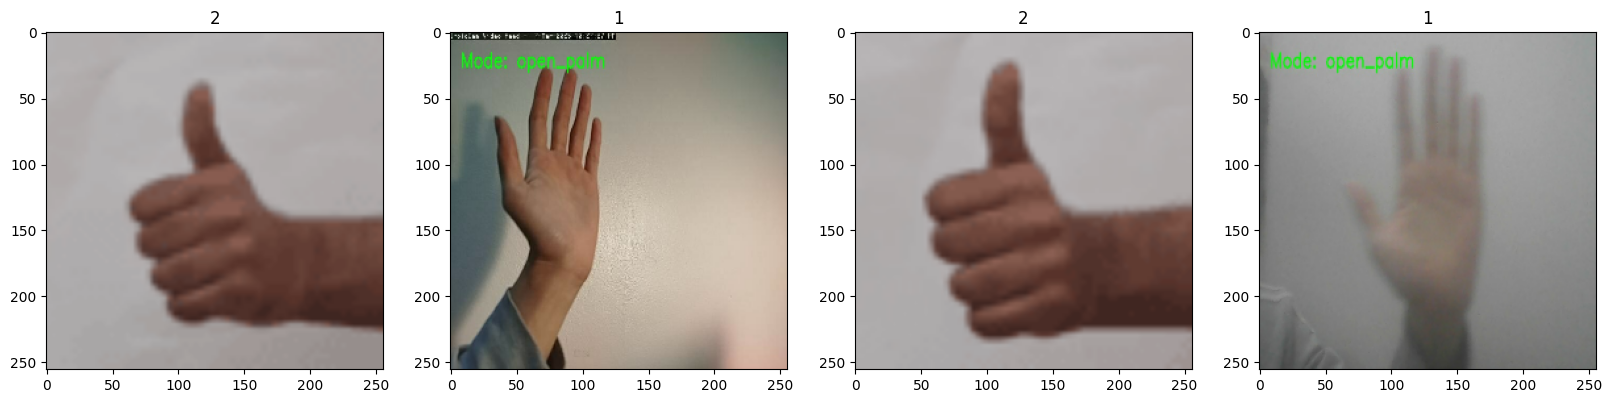

In [49]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

#Scale Data

In [50]:
data = data.map(lambda x,y: (x/255, y))

In [51]:
data.as_numpy_iterator().next()

(array([[[[0.49381128, 0.5344363 , 0.5016544 ],
          [0.3721201 , 0.41917893, 0.37996325],
          [0.09123775, 0.13829657, 0.09908088],
          ...,
          [0.3137255 , 0.4117647 , 0.3882353 ],
          [0.3107843 , 0.40882352, 0.3852941 ],
          [0.3071691 , 0.40520832, 0.3816789 ]],
 
         [[0.3055147 , 0.34987745, 0.31335783],
          [0.3041054 , 0.34914216, 0.31194854],
          [0.06121324, 0.10827206, 0.06905637],
          ...,
          [0.31764707, 0.41568628, 0.39215687],
          [0.31403187, 0.41207108, 0.38854167],
          [0.30980393, 0.40784314, 0.38431373]],
 
         [[0.3466299 , 0.39368874, 0.35447302],
          [0.28449756, 0.32683823, 0.2923407 ],
          [0.08762255, 0.13468137, 0.09546569],
          ...,
          [0.32077205, 0.41881126, 0.39528185],
          [0.31764707, 0.41568628, 0.39215687],
          [0.3137255 , 0.4117647 , 0.3882353 ]],
 
         ...,
 
         [[0.5421569 , 0.49509802, 0.4480392 ],
          [0.54313

#Split Data

In [52]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [53]:
train_size

53

In [54]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#Build Deep Learning Model

In [55]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [57]:
model = Sequential()

In [58]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 nhãn, softmax để tính xác suất

In [59]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [60]:
for img, label in train.take(1):
    print(img.shape, label.numpy())  # Kiểm tra nhãn có đúng là [0,1,2] không

(32, 256, 256, 3) [0 2 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 2 1 2 2 1 1 0 2 2 0 0 0 2 2 2]


In [61]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

#Train

In [62]:
logdir=r'D:\Project\HandGesture_Community_Edition\logs'

In [63]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [64]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 290ms/step - accuracy: 0.5348 - loss: 0.9421 - val_accuracy: 0.8917 - val_loss: 0.2924
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step - accuracy: 0.9361 - loss: 0.2051 - val_accuracy: 0.9646 - val_loss: 0.0862
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 287ms/step - accuracy: 0.9647 - loss: 0.1001 - val_accuracy: 0.9750 - val_loss: 0.0624
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 16s 305ms/step - accuracy: 0.9838 - loss: 0.0502 - val_accuracy: 0.9896 - val_loss: 0.0298
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 285ms/step - accuracy: 0.9948 - loss: 0.0201 - val_accuracy: 0.9937 - val_loss: 0.0168
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 314ms/step - accuracy: 0.9984 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 278ms/step - accuracy: 0.9993 - loss: 0.0048 - val_accuracy: 0.9979 - val_loss: 0.0075
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 14s 267ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accu

#Plot Performance

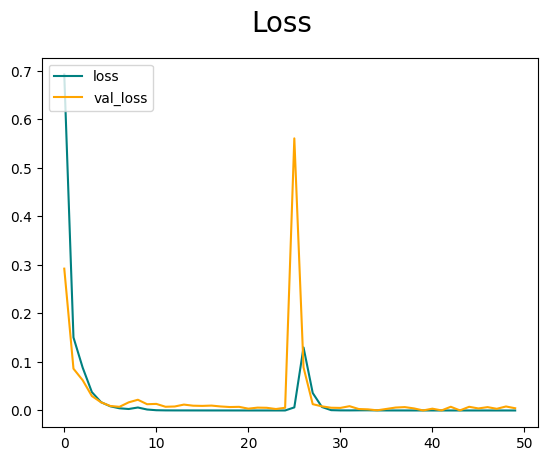

In [65]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

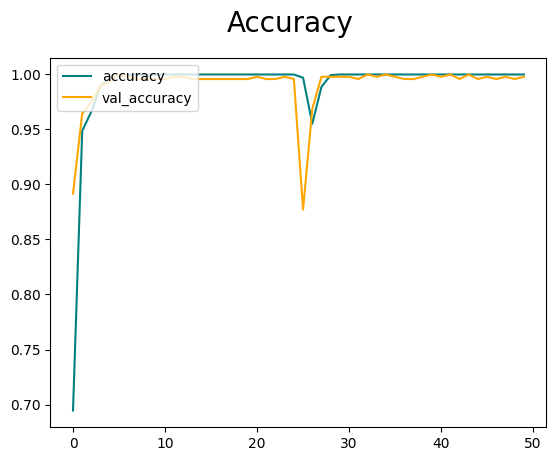

In [66]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#Evaluate

In [67]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [68]:
for batch in test.take(1):  # Lấy một batch từ test dataset
    X, y = batch
    print("Shape của y_true:", y.shape)
    print("Dữ liệu của y_true:", y.numpy())
    print("Kiểu dữ liệu của y_true:", y.dtype)

Shape của y_true: (32,)
Dữ liệu của y_true: [2 2 2 0 0 1 2 0 1 0 0 2 2 2 1 1 2 1 0 2 1 1 2 0 1 1 0 0 0 1 1 1]
Kiểu dữ liệu của y_true: <dtype: 'int32'>


In [69]:
yhat = model.predict(X)

print("Shape của y_pred:", yhat.shape)
print("Dữ liệu của y_pred (5 mẫu đầu):", yhat[:5])  # In thử 5 mẫu đầu
print("Kiểu dữ liệu của y_pred:", yhat.dtype)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Shape của y_pred: (32, 3)
Dữ liệu của y_pred (5 mẫu đầu): [[4.2221741e-29 3.4804963e-12 1.0000000e+00]
 [6.4646657e-09 2.4222717e-09 1.0000000e+00]
 [3.6802600e-04 1.7567239e-05 9.9961448e-01]
 [1.0000000e+00 4.0139576e-16 2.4889055e-10]
 [1.0000000e+00 2.6862743e-23 3.4768333e-20]]
Kiểu dữ liệu của y_pred: float32


In [70]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()  

In [71]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)  # Dự đoán đầu ra (xác suất)
    yhat_labels = np.argmax(yhat, axis=1)  # Chọn nhãn có xác suất cao nhất

    pre.update_state(y, yhat_labels)
    re.update_state(y, yhat_labels)
    acc.update_state(y, yhat_labels)  # acc = SparseCategoricalAccuracy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [72]:
print(f"Precision: {pre.result().numpy():.4f}")
print(f"Recall: {re.result().numpy():.4f}")
print(f"Accuracy: {acc.result().numpy():.4f}")

Precision: 1.0000
Recall: 1.0000
Accuracy: 0.2500


#Test

In [73]:
import cv2

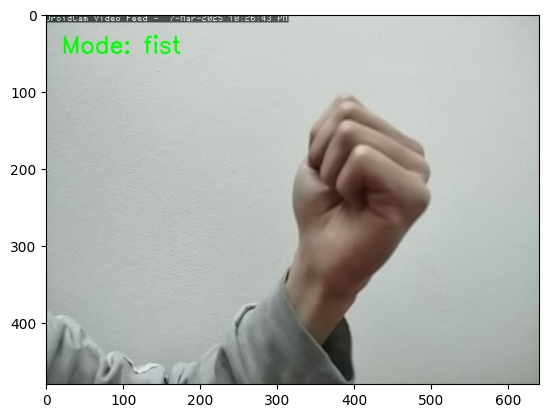

In [74]:
img = cv2.imread(r"D:\Project\HandGesture_Community_Edition\models\data\fist\droidcam_img_4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
plt.imshow(img)
plt.show()

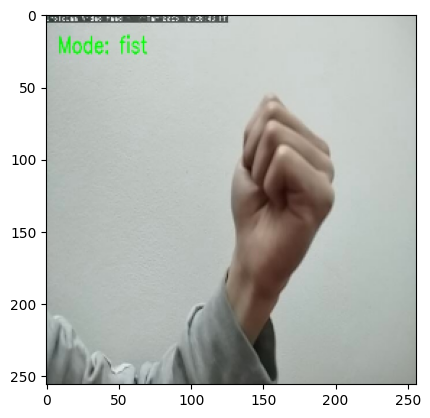

In [75]:
resize = tf.image.resize(img, (256, 256)).numpy().astype(np.float32)  # Chuyển về NumPy
plt.imshow(resize.astype(int))
plt.show()

In [76]:
img_ready = np.expand_dims(resize / 255.0, axis=0)  # Chia 255 để chuẩn hóa

In [77]:
yhat = model.predict(img_ready)  
yhat_label = np.argmax(yhat)  # Chọn nhãn có xác suất cao nhất

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [78]:
if yhat_label == 0:
    print("Predicted class is fist")
elif yhat_label == 1:
    print("Predicted class is open_palm")
else:
    print("Predicted class is thumbs_up")

Predicted class is fist


#Save the Model

In [79]:
import os

In [80]:
from tensorflow.keras.models import load_model

In [81]:
model.save(os.path.join(r'D:\Project\HandGesture_Community_Edition\models','phanloai_cuchitay.h5'))

In [82]:
new_model = load_model('phanloai_cuchitay.h5')

In [83]:
print(resize.shape)  # Phải là (256, 256, 3)
print(np.expand_dims(resize / 255, 0).shape)  # Phải là (1, 256, 256, 3)

(256, 256, 3)
(1, 256, 256, 3)


In [84]:
yhat = new_model.predict(np.expand_dims(resize / 255, 0))  # Dự đoán
print("Raw output:", yhat)  # In ra xác suất dự đoán

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Raw output: [[1.0000000e+00 1.2179943e-21 5.5728680e-17]]


In [85]:
import os

# Đường dẫn đến dataset
dataset_path = r"D:\Project\HandGesture_Community_Edition\models\data"

# Lấy danh sách các thư mục trong dataset (tức là các nhãn)
class_labels = sorted(os.listdir(dataset_path))  # Sắp xếp theo thứ tự alphabet

# In ra thứ tự nhãn
print("Thứ tự nhãn trong dataset:")
for index, label in enumerate(class_labels):
    print(f"Label: {label}, Index: {index}")


Thứ tự nhãn trong dataset:
Label: fist, Index: 0
Label: open_palm, Index: 1
Label: thumbs_up, Index: 2
